# Setup


In [1]:
# Mount to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install rtree
!pip install geopandas
!pip install osmnx
!pip install pygeos
!pip install matplotlib==3.1.3 
!pip install contextily
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 16.7 MB 407 kB/s 
     |████████████████████████████████| 6.3 MB 45.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95 kB 125 kB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 11.2 MB 39.7 MB/s 
     |████████████████████████████████| 944 kB 40.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 5.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 4.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osmnx 1.1.2 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 1.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox
import pytz
import os
import contextily
import mapclassify

from pygeos import predicates
from scipy.spatial import distance

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


# Census Block Group Data

In [4]:
# Use year and geoid
year = '2021'
geoid = '41860' # San Francisco Metro

# Load in Core Based Statistical Areas (CBSAs)
cbsa = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Data/shared_data_LUR/data/boundaries/Core Based Statistical Areas (CBSAs)/cb_2018_us_cbsa_500k.shp')
print(cbsa.crs)

# Plot area based on id number
region =  cbsa.loc[cbsa['GEOID'] == geoid]
region_proj = region.to_crs('ESRI:102003')

region_proj_buffer=region_proj.buffer(200).to_frame('geometry')

epsg:4269


In [5]:
#Load in census block group
us_cbg=gpd.read_file("/content/drive/MyDrive/Colab Notebooks/Data/cb_2021_06_bg_500k/cb_2021_06_bg_500k.shp")
cbg_proj = us_cbg.to_crs('ESRI:102003')

san_fran_cbg= cbg_proj.sjoin(region_proj_buffer,predicate="within")


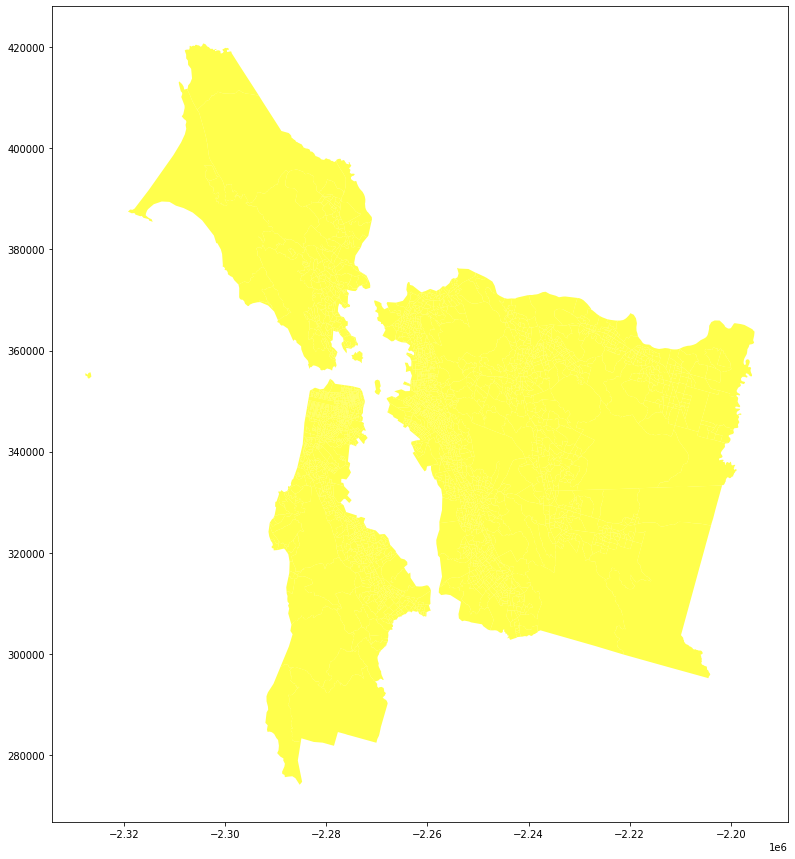

In [6]:
fig, ax = plt.subplots(figsize=(15, 15))
san_fran_cbg.plot(ax=ax, alpha=0.7, color="yellow")

#Location of Stations and Number of Stations

In [7]:
# Use year and geoid
year = '2021'
geoid = '41860' # San Francisco Metro

# Load in Core Based Statistical Areas (CBSAs)
cbsa = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Data/shared_data_LUR/data/boundaries/Core Based Statistical Areas (CBSAs)/cb_2018_us_cbsa_500k.shp')
print(cbsa.crs)

# Plot area based on id number
region =  cbsa.loc[cbsa['GEOID'] == geoid]
region_proj = region.to_crs('ESRI:102003')

epsg:4269


In [8]:
#Plot locations of stations
sites = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/sensors_ca.csv", sep=",", encoding='cp1252')
san_fran_metro_sites = sites[sites['airDistrict'].str.contains("San Francisco Bay")] 
san_fran_metro_outside_sites = san_fran_metro_sites[san_fran_metro_sites['DEVICE_LOCATIONTYPE'].str.contains("outside", na=False)] 
san_fran_gdf = gpd.GeoDataFrame(san_fran_metro_outside_sites,
                                geometry=gpd.points_from_xy(san_fran_metro_outside_sites['longitude'],
                                                            san_fran_metro_outside_sites['latitude']),
                                crs='EPSG:4326')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (43) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
san_fran_gdf_proj = san_fran_gdf.to_crs('ESRI:102003')

In [10]:
san_fran_region = san_fran_gdf_proj.clip(region_proj)

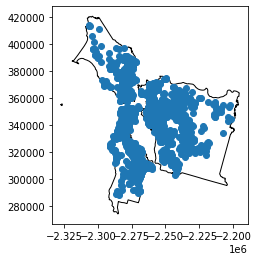

In [11]:
# Plot stations and San Francisco Metro Boundary
ax = region_proj.plot(edgecolor='k',facecolor='none', zorder=1)
san_fran_region.plot(ax=ax)

In [12]:
# Display dataframe and use number of rows to see number of stations
san_fran_metro_outside_sites

ID                                      label DEVICE_LOCATIONTYPE  \
0      14633                          Hazelwood canary              outside   
2      14091                                WC Hillside             outside   
18     69629                              1 Iverson Way             outside   
23     67357             10 Alhambra Ct. Portola Valley             outside   
26     85597                            10 Drake Summit             outside   
...      ...                                        ...                 ...   
17889  70581                                  Zero Home             outside   
17896  70701                          Zhanger Household             outside   
17898  75223                                 Zinn Drive             outside   
17902  64013                                    Zinnias             outside   
17910  67815  [Outdoor] Great Hwy bw Moraga and Noriega             outside   

       THINGSPEAK_PRIMARY_ID THINGSPEAK_PRIMARY_ID_READ_KEY  \
0                     559921               CU4BQZZ38WO5UJ4C   
2                     553460               1ZIXYGGG1W61J6OI   
18                   1149871               A9WULDU5MEGQM47G   
23                   1141195               07YN8B2ENMC2UDJ1   
26                   1205497               U88H55Q79OCBUG61   
...                      ...                            ...   
17889                1153817               SBMHGNYY7XMFL8W3   
17896                1154078               JCG1GRWPREZU5HM8   
17898                1167547               0GUJRGNLGTPEDQG5   
17902                1129955               0RS7K7WDU4ZLXC71   
17910                1142198               Q8HG3CX55QZJRHOO   

       THINGSPEAK_SECONDARY_ID THINGSPEAK_SECONDARY_ID_READ_KEY   latitude  \
0                       559922                 D0YNZ1LM59LL49VQ  37.275561   
2                       553463                 NYFHXX29D0MHNI9F  37.883620   
18                     1149872                 T2REE426RRL406H6  38.223993   
23                     1141196                 DA3NZMOQ0B5BREC0  37.384720   
26                     1205498                 GC3QS89CK5K138SS  38.065510   
...                        ...                              ...        ...   
17889                  1153818                 438WTLNRSPAZXGLB  38.108130   
17896                  1154079                 71GF2PJ3V6QPBVSO  37.680096   
17898                  1167548                 OYHQS9F7CTRURKFE  37.827560   
17902                  1129957                 HAAEENLWMGQNOHDV  37.388526   
17910                  1142199                 AN40ROLAVV9EUUEJ  37.753751   

        longitude   pm25  ...        locationID      deviceDeploymentID  \
0     -121.964134  10.63  ...  21ba6be12a5d4105  21ba6be12a5d4105_14633   
2     -122.070087   6.05  ...  4d6fa6a2467fc3f2  4d6fa6a2467fc3f2_14091   
18    -122.659176   4.81  ...  26e23b64a4d3b798  26e23b64a4d3b798_69629   
23    -122.204070   3.82  ...  c8588a4b6e5a1749  c8588a4b6e5a1749_67357   
26    -122.830478   5.43  ...  f214582636515f07  f214582636515f07_85597   
...           ...    ...  ...               ...                     ...   
17889 -122.539222   5.39  ...  7747338deaabcb6f  7747338deaabcb6f_70581   
17896 -122.403105   2.15  ...  cad032fc11a87b86  cad032fc11a87b86_70701   
17898 -122.205627   4.78  ...  501faea8503f458a  501faea8503f458a_75223   
17902 -122.021510  12.40  ...  2e95ce7676bb094b  2e95ce7676bb094b_64013   
17910 -122.508453   3.47  ...  cf28bfebb77ad3b4  cf28bfebb77ad3b4_67815   

             airDistrict pwfsl_closestDistance  pwfsl_closestMonitorID  \
0      San Francisco Bay          10166.503117            060850005_01   
2      San Francisco Bay           7261.648575            060130002_01   
18     San Francisco Bay          24364.729919            060970004_01   
23     San Francisco Bay          10919.466843            060811001_01   
26     San Francisco Bay          29232.565602            060410001_01   
...                  .

# Road Data

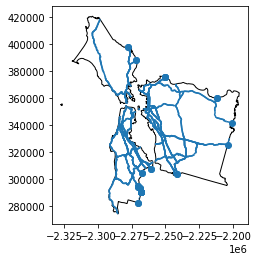

In [ ]:
# Read Primary and Secondary Roads

roads = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Data/Roads/tl_2021_06_prisecroads.shp')
roads_proj = roads.to_crs('ESRI:102003')

region_roads_proj = gpd.clip(roads_proj, region_proj)

ax = region_proj.plot(edgecolor='k', facecolor='none')
region_roads_proj.plot(ax=ax)

## Distance to Road

In [ ]:
from tqdm import tqdm

In [ ]:
%%time

for index in tqdm(san_fran_region.index):
    # distance to A1 roads
    min_dist = region_roads_proj.loc[region_roads_proj['MTFCC'] == 'S1100'].distance(san_fran_region.loc[index,'geometry']).min()
    san_fran_region.loc[index, 'dist_A1'] = min_dist
    
    # distance to A2/A3 roads
    min_dist = region_roads_proj.loc[region_roads_proj['MTFCC'] == 'S1200'].distance(san_fran_region.loc[index,'geometry']).min()
    san_fran_region.loc[index, 'dist_A23'] = min_dist

Streaming output truncated to the last 5000 lines.
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A v

CPU times: user 34.7 s, sys: 844 ms, total: 35.5 s
Wall time: 40.3 s


## Sum of Line Lengths in Buffer

In [ ]:
region_roads_proj_A1 = region_roads_proj.loc[region_roads_proj['MTFCC'] == 'S1100'].reset_index()
region_roads_proj_A23 = region_roads_proj.loc[region_roads_proj['MTFCC'] == 'S1200'].reset_index()

for buffer_size in [50, 100, 150, 300, 400, 500, 750, 1000, 1500, 3000, 5000, 10000, 15000]: 
    
    print(buffer_size)
    for index in tqdm(region_epa_sites_proj.index):
        
        buffer = region_epa_sites_proj.loc[index,'geometry'].buffer(buffer_size)
        
        selected_index = region_roads_proj_A1.sindex.query(buffer)
        selected_A1 = region_roads_proj_A1.loc[selected_index]
        
        if selected_A1.shape[0] > 0:
        
            # Sum of A1 line lengths in buffers
            ll = gpd.clip(selected_A1, buffer).length.sum()
            region_epa_sites_proj.loc[index, 'll_A1_s'+str(buffer_size)] = ll
        
        
        selected_index = region_roads_proj_A23.sindex.query(buffer)
        selected_A23 = region_roads_proj_A23.loc[selected_index]
        
        if selected_A23.shape[0] > 0:
        
            # Sum of A1 line lengths in buffers
            ll = gpd.clip(selected_A23, buffer).length.sum()
            region_epa_sites_proj.loc[index, 'll_A23_s'+str(buffer_size)] = ll

50


NameError: ignored

In [ ]:
region_epa_sites_proj.to_file("data/geographic_covariates/SF_EPA.geojson", driver='GeoJSON')

# Spatial Join of Population Data and Boundary

In [13]:
# Import both datasets
population_data= gpd.read_file("/content/drive/MyDrive/Colab Notebooks/Data/nhgis0001_csv/nhgis0001_csv/nhgis0001_ds249_20205_blck_grp.csv")
boundary_data=gpd.read_file("/content/drive/MyDrive/Colab Notebooks/Data/cb_2021_06_bg_500k/cb_2021_06_bg_500k.shp")

In [14]:
# Edit GEOID row to match for each dataset
population_data['GEOID']=population_data.apply(lambda x: x['GEOID'][7:19], axis = 1)

#Match the CRS and merge the data
population_data.crs = "EPSG:4269"
merged_data = pd.merge(boundary_data, population_data,how="outer", on=["GEOID", "GEOID"])
merged_data

STATEFP COUNTYFP TRACTCE BLKGRPCE               AFFGEOID         GEOID  \
0          06      073  007303        2  1500000US060730073032  060730073032   
1          06      037  297601        3  1500000US060372976013  060372976013   
2          06      001  428302        3  1500000US060014283023  060014283023   
3          06      041  130204        1  1500000US060411302041  060411302041   
4          06      059  062702        5  1500000US060590627025  060590627025   
...       ...      ...     ...      ...                    ...           ...   
25602     NaN      NaN     NaN      NaN                    NaN  060819901000   
25603     NaN      NaN     NaN      NaN                    NaN  060839900000   
25604     NaN      NaN     NaN      NaN                    NaN  060879901000   
25605     NaN      NaN     NaN      NaN                    NaN  060979901000   
25606     NaN      NaN     NaN      NaN                    NaN  061119901000   

      NAME       NAMELSAD LSAD     ALAND  ...  AMPWM006 AMPWM007 AMPWM008  \
0        2  Block Group 2   BG  155982.0  ...        13       32       36   
1        3  Block Group 3   BG  442073.0  ...        13       30      162   
2        3  Block Group 3   BG  647392.0  ...        13      168      115   
3        1  Block Group 1   BG  877599.0  ...        13       13       26   
4        5  Block Group 5   BG  372747.0  ...        13       13       13   
...    ...            ...  ...       ...  ...       ...      ...      ...   
25602  NaN            NaN  NaN       NaN  ...        13       13       13   
25603  NaN            NaN  NaN       NaN  ...        13       13       13   
25604  NaN            NaN  NaN       NaN  ...        13       13       13   
25605  NaN            NaN  NaN       NaN  ...        13       13       13   
25606  NaN            NaN  NaN       NaN  ...        13       13       13   

      AMPWM009 AMPWM010 AMP4M001 AMP4M002 AMP4M003  AMR9M001 geometry_y  
0           13       36      218      220       46  27285823       None  
1           13      162      333      243      237  10271675       None  
2           13      115      515      514       84  29882343       None  
3           13       26      242      240       26  24629124       None  
4           13       13      240      238        8  49190529       None  
...        ...      ...      ...      ...      ...       ...        ...  
25602       13       13       13       13       13                 None  
25603       13       13       13       13       13                 None  
25604       13       13       13       13       13                 None  
25605       13       13       13       13       13                 None  
25606       13       13       13       13       13                 None  

[25607 rows x 85 columns]

# Spatial Interpolation

## Prepare Dataset for Spatial Interpolation

In [15]:
# Bring in csv file from above
stations_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Averages/Averages with Lat and Long.csv")
stations_data.head()

Station ID   latitude   longitude  Average PM Value
0      100023  37.655017 -122.473087         11.418096
1      100255  37.898709 -122.701600          7.467523
2       10092  37.857566 -121.972860          7.168577
3      100951  37.436701 -122.202417          8.481201
4      101031  37.760164 -122.470343          6.635202

In [16]:
# Drop rows with no latitude and longitude
stations_data = stations_data.dropna(subset=['latitude','longitude'])

In [17]:
# Convert the mean_station_coords dataframe to geodataframe
stations_data_gdf = gpd.GeoDataFrame(stations_data, 
                                    geometry=gpd.points_from_xy(stations_data.longitude, stations_data.latitude), 
                                    crs='epsg:4326')

In [18]:
# Reproject to ESRI 102003
stations_data_gdf= stations_data_gdf.to_crs('ESRI:102003')

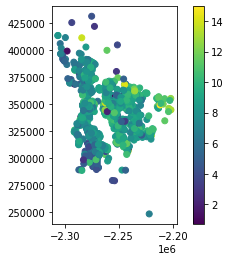

In [19]:
# Plot the stations on map color coded by summed PM2.5 during the selected time frame (with legend)
stations_data_gdf.plot(column="Average PM Value", legend=True)

## Prepare Grids for Interpolation

In [20]:
# Get x and y coordinates of stations
x = stations_data_gdf["geometry"].x
y = stations_data_gdf['geometry'].y

# Create list of xy coordinate pairs
coords = [list(xy) for xy in zip(x, y)]

# Get PM2.5 values of stations
values = stations_data_gdf["Average PM Value"].values

# Get x and y extent of stations
min_x, min_y, max_x, max_y = region_proj.total_bounds

In [21]:
min_x, min_y, max_x, max_y

(-2327633.9794486947,
 274160.20418690704,
 -2195338.0820014905,
 420698.73798638256)

## IDW Function

In [22]:
def IDW(coords, values, res, p):

    # Get x and y extent of stations
    min_x, min_y, max_x, max_y = np.array(coords)[:,0].min(), \
                                  np.array(coords)[:,1].min(), \
                                  np.array(coords)[:,0].max(), \
                                  np.array(coords)[:,1].max()

    # Create gridcells with the target resolution
    xnew = np.linspace(min_x, max_x, int((max_x - min_x) / res))
    ynew = np.linspace(min_y, max_y, int((max_y - min_y) / res))

    # Compose two 2D arrays
    # xx: x array 
    # yy: y array 
    xx, yy = np.meshgrid(xnew,ynew)

    # Create an empty numpy array that will store the interpolated values
    u = np.empty((xx.shape))

    # Compose a nested for loop that go through each grid cell
    for i in range(xx.shape[0]): # this is the index over latitude (think about this as a 2d array)
        
        for j in range(xx.shape[1]): # this is the index over longitude
            # Compose the current cell's x and y into a numpy array
            current_xy = np.array([[xx[i,j], yy[i,j]]])

            # Calculate distance between the current cell with all known points
            d = distance.cdist(current_xy, np.array(coords), 'euclidean')

            # Add the second option
            if d.min() == 0:

                # np.unravel_index(d.argmin(), d.shape) finds the smallest value's index
                # https://numpy.org/doc/stable/reference/generated/numpy.unravel_index.html
                u_ij = values[np.unravel_index(d.argmin(), d.shape)] 

            else: 
                # update the distance matrix using p
                d = d**p

                # calculate weight
                w = 1.0 / d

                # calculate the interpolated value for the chosen cell 
                u_ij = np.sum(w * values) / np.sum(w)

            # update the value of current cell in the numpy array
            u[i, j] = u_ij

    return u, xx, yy

In [23]:
# Set res and p
res = 1000 # 1km
p = 1

# Call the IDW function that we just defined
u, xx, yy = IDW(coords, values, res, p)

In [24]:
# check the size of xx and yy now
xx.shape, yy.shape

((182, 104), (182, 104))

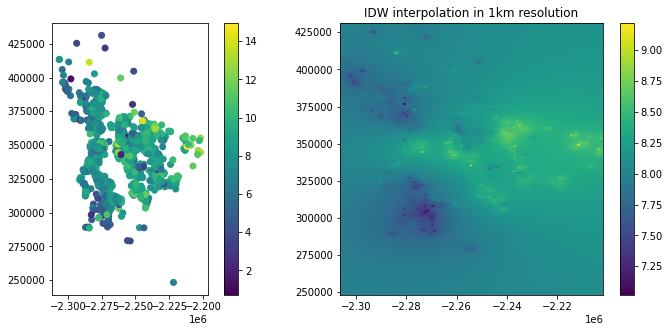

In [25]:
# Plot the resulted interpolation
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

# plot point values on the left
stations_data_gdf.plot(column='Average PM Value', legend=True, ax=ax[0])

# plot interpolation results on the right
im = ax[1].pcolormesh(xx, yy, u)
ax[1].set_title('IDW interpolation in 1km resolution')
fig.colorbar(im, ax=ax[1])

plt.show()

In [26]:
u.flatten().shape

(18928,)

In [27]:
# Convert our interpolation results into a point-based geodataframe
from shapely.geometry import Polygon

interp_gdf = gpd.GeoDataFrame(u.flatten(), 
                              geometry=gpd.points_from_xy(xx.flatten(), 
                                                          yy.flatten()), 
                              crs='ESRI:102003')

for index in interp_gdf.index:
  x, y = interp_gdf.loc[index,'geometry'].x, interp_gdf.loc[index,'geometry'].y
  minx = x - res/2
  miny = y - res/2
  maxx = x + res/2
  maxy = y + res/2
  
  poly = Polygon([[minx,miny],[maxx, miny],[maxx, maxy],[minx, maxy]])
  interp_gdf.loc[index,'poly_geom'] = poly

interp_gdf['geometry'] = interp_gdf['poly_geom']

In [28]:
interp_gdf

0                                           geometry  \
0      7.988468  POLYGON ((-2306938.085 247815.521, -2305938.08...   
1      7.987973  POLYGON ((-2305921.007 247815.521, -2304921.00...   
2      7.987494  POLYGON ((-2304903.929 247815.521, -2303903.92...   
3      7.987034  POLYGON ((-2303886.851 247815.521, -2302886.85...   
4      7.986594  POLYGON ((-2302869.773 247815.521, -2301869.77...   
...         ...                                                ...   
18923  8.143009  POLYGON ((-2206247.344 430709.816, -2205247.34...   
18924  8.143666  POLYGON ((-2205230.266 430709.816, -2204230.26...   
18925  8.144295  POLYGON ((-2204213.188 430709.816, -2203213.18...   
18926  8.144896  POLYGON ((-2203196.109 430709.816, -2202196.10...   
18927  8.145470  POLYGON ((-2202179.031 430709.816, -2201179.03...   

                                               poly_geom  
0      POLYGON ((-2306938.085321138 247815.5211053359...  
1      POLYGON ((-2305921.0071251485 247815.521105335...  
2      POLYGON ((-2304903.928929159 247815.5211053359...  
3      POLYGON ((-2303886.8507331694 247815.521105335...  
4      POLYGON ((-2302869.7725371798 247815.521105335...  
...                                                  ...  
18923  POLYGON ((-2206247.343918163 430709.8158451803...  
18924  POLYGON ((-2205230.2657221733 430709.815845180...  
18925  POLYGON ((-2204213.1875261837 430709.815845180...  
18926  POLYGON ((-2203196.109330194 430709.8158451803...  
18927  POLYGON ((-2202179.0311342045 430709.815845180...  

[18928 rows x 3 columns]

In [29]:
# Rename column
interp_gdf= interp_gdf.rename(columns={0: "PM 2.5 Average" })

In [30]:
# Drop column called index_right
san_fran_cbg=san_fran_cbg.drop(columns=['index_right'])

# Spatial Join

## Join and Prepare for Plot

In [32]:
# Spatial join of cbg and pm averages
area_interp= san_fran_cbg.sjoin(interp_gdf)

In [33]:
area_interp

STATEFP COUNTYFP TRACTCE BLKGRPCE               AFFGEOID         GEOID  \
2          06      001  428302        3  1500000US060014283023  060014283023   
7157       06      001  428302        1  1500000US060014283021  060014283021   
9757       06      001  428301        3  1500000US060014283013  060014283013   
14994      06      001  428301        4  1500000US060014283014  060014283014   
25179      06      001  428302        2  1500000US060014283022  060014283022   
...       ...      ...     ...      ...                    ...           ...   
25436      06      041  106001        1  1500000US060411060011  060411060011   
25436      06      041  106001        1  1500000US060411060011  060411060011   
25436      06      041  106001        1  1500000US060411060011  060411060011   
25436      06      041  106001        1  1500000US060411060011  060411060011   
25436      06      041  106001        1  1500000US060411060011  060411060011   

      NAME       NAMELSAD LSAD     ALAND   AWATER  \
2        3  Block Group 3   BG    647392   130654   
7157     1  Block Group 1   BG    727957   344116   
9757     3  Block Group 3   BG    145413        0   
14994    4  Block Group 4   BG   3438743  1597298   
25179    2  Block Group 2   BG    856061        0   
...    ...            ...  ...       ...      ...   
25436    1  Block Group 1   BG  10407922  1617909   
25436    1  Block Group 1   BG  10407922  1617909   
25436    1  Block Group 1   BG  10407922  1617909   
25436    1  Block Group 1   BG  10407922  1617909   
25436    1  Block Group 1   BG  10407922  1617909   

                                                geometry  index_right  \
2      POLYGON ((-2262236.938 342217.089, -2261881.37...         9611   
7157   POLYGON ((-2263160.533 341984.329, -2262236.93...         9611   
9757   POLYGON ((-2262261.398 340940.851, -2262139.50...         9611   
14994  POLYGON ((-2263084.640 341322.831, -2262521.05...         9611   
25179  POLYGON ((-2262465.973 341340.049, -2262204.96...         9611   
...                                                  ...          ...   
25436  POLYGON ((-2277668.246 378934.432, -2277136.17...        13448   
25436  POLYGON ((-2277668.246 378934.432, -2277136.17...        13447   
25436  POLYGON ((-2277668.246 378934.432, -2277136.17...        13552   
25436  POLYGON ((-2277668.246 378934.432, -2277136.17...        13551   
25436  POLYGON ((-2277668.246 378934.432, -2277136.17...        13553   

       PM 2.5 Average                                          poly_geom  
2            8.521692  POLYGON ((-2263203.722893583 340778.3670504502...  
7157         8.521692  POLYGON ((-2263203.722893583 340778.3670504502...  
9757         8.521692  POLYGON ((-2263203.722893583 340778.3670504502...  
14994        8.521692  POLYGON ((-2263203.722893583 340778.3670504502...  
25179        8.521692  POLYGON ((-2263203.722893583 340778.3670504502...  
...               ...                                                ...  
25436        7.937070  POLYGON ((-2274391.5830494696 378165.598571854...  
25436        7.915015  POLYGON ((-2275408.661245459 378165.5985718549...  
25436        7.943886  POLYGON ((-2274391.5830494696 379176.064288649...  
25436        7.920749  POLYGON ((-2275408.661245459 379176.0642886496...  
25436        7.962456  POLYGON ((-2273374.5048534796 379176.064288649...  

[17519 rows x 15 columns]

In [34]:
#Rename column and groupby geoid
area_interp=area_interp.rename(columns={0: "PM 2.5 Average"})
area_interp=area_interp.groupby(["GEOID"]).mean("PM 2.5 Average")


In [35]:
# Merge data
merged_data=pd.merge(area_interp["PM 2.5 Average"], san_fran_cbg, on=["GEOID"])

In [36]:
# Dataframe to Geodataframe
merged_data_gdf = gpd.GeoDataFrame(merged_data, geometry='geometry', crs='ESRI:102003')                           

In [37]:
min=merged_data_gdf["PM 2.5 Average"].min()
max=merged_data_gdf["PM 2.5 Average"].max()


## Plot

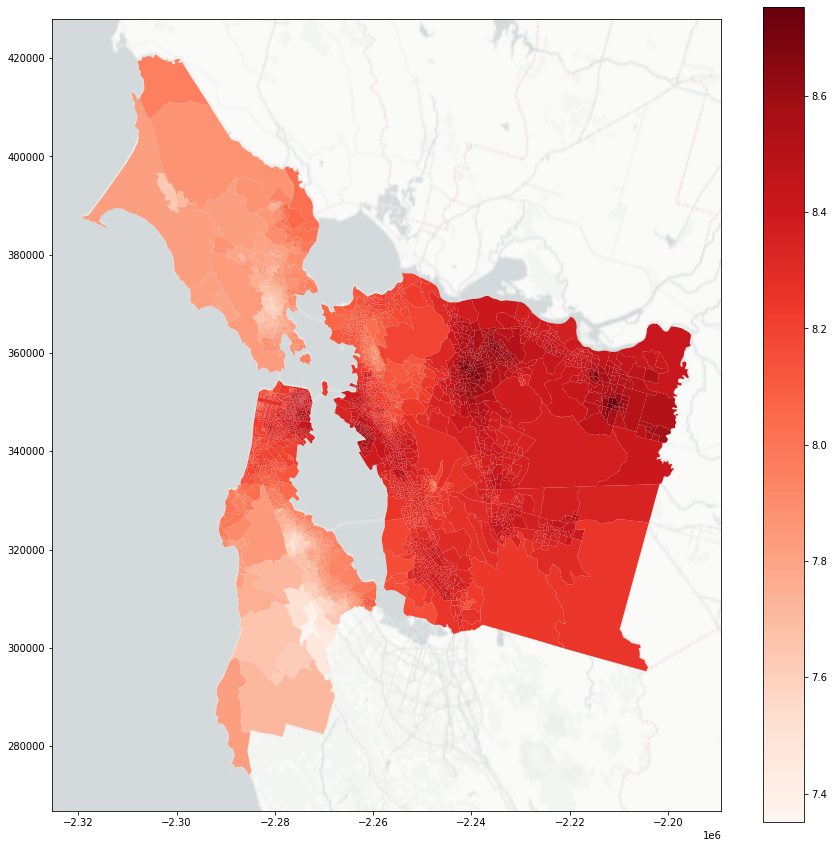

In [38]:
#Plot our results
fig, ax = plt.subplots(figsize=(15, 15))

merged_data_gdf.plot(column=('PM 2.5 Average'),markersize=1, ax=ax, cmap="Reds", aspect="auto")

# Add basemap
contextily.add_basemap(ax=ax, crs=san_fran_cbg.crs,  source=contextily.providers.CartoDB.PositronNoLabels)

sm = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=min, vmax=max))
sm.set_array([])
plt.colorbar(sm)




# Population-Weighted Exposure

## Prepare Dataset for Population Weighted Exposure

In [39]:
# Join population with current map

#Read in population data
population_data= gpd.read_file("/content/drive/MyDrive/Colab Notebooks/Data/nhgis0001_csv/nhgis0001_csv/nhgis0001_ds249_20205_blck_grp.csv")

# Edit GEOID row to match for each dataset and reproject
population_data['GEOID']=population_data.apply(lambda x: x['GEOID'][7:19], axis = 1)
population_data_proj = population_data.set_crs('ESRI:102003', inplace = True)

pop_weighted=merged_data_gdf.merge(population_data_proj, on='GEOID', how='left')

In [40]:
pop_weighted['AMPWE001']=pop_weighted['AMPWE001'].astype(float)
pop_weighted['AMPWE002']=pop_weighted['AMPWE002'].astype(float)
pop_weighted['AMPWE003']=pop_weighted['AMPWE003'].astype(float)
pop_weighted['AMPWE004']=pop_weighted['AMPWE004'].astype(float)
pop_weighted['AMPWE005']=pop_weighted['AMPWE005'].astype(float)
pop_weighted['AMPWE006']=pop_weighted['AMPWE006'].astype(float)
pop_weighted['AMPWE007']=pop_weighted['AMPWE007'].astype(float)
pop_weighted['AMPWE008']=pop_weighted['AMPWE008'].astype(float)
pop_weighted['AMP4E003']=pop_weighted['AMP4E003'].astype(float)
pop_weighted['PM 2.5 Average']=pop_weighted['PM 2.5 Average'].astype(float)
pop_weighted['Minority Population']= pop_weighted[['AMPWE003', 'AMPWE004', 'AMPWE005',"AMPWE006","AMPWE007","AMPWE008","AMP4E003"]].sum(axis = 1, skipna = True)
pop_weighted['Minority Population']=pop_weighted['Minority Population'].astype(float)

In [41]:
total_pop=pop_weighted['AMPWE001'].sum()

In [42]:
pop_weighted['Pop Weighted Exposure'] = pop_weighted['PM 2.5 Average'] * ((pop_weighted['AMPWE001']/total_pop))
pop_weighted['White Pop Weighted Exposure']= pop_weighted['PM 2.5 Average'] *((pop_weighted['AMPWE002'])/(pop_weighted['AMPWE001']))
pop_weighted['Black Pop Weighted Exposure']= pop_weighted['PM 2.5 Average'] *((pop_weighted['AMPWE003'])/(pop_weighted['AMPWE001']))
pop_weighted['Hispanic Pop Weighted Exposure']= pop_weighted['PM 2.5 Average'] *((pop_weighted['AMP4E003'])/(pop_weighted['AMPWE001']))
pop_weighted['Asian Pop Weighted Exposure']= pop_weighted['PM 2.5 Average'] *(pop_weighted['AMPWE005']/pop_weighted['AMPWE001'])
pop_weighted['Minority Pop Weighted Exposure'] = pop_weighted['PM 2.5 Average'] * (pop_weighted['Minority Population']/pop_weighted['AMPWE001'])

In [43]:
pop_weighted_gdf = gpd.GeoDataFrame(pop_weighted, geometry='geometry_x', crs='ESRI:102003')                           

In [44]:
pop_weighted_gdf.to_csv(r'/content/drive/MyDrive/Colab Notebooks/Data/Population Weighted GDF.csv') 

In [45]:
pop_weighted_gdf

GEOID  PM 2.5 Average STATEFP COUNTYFP TRACTCE BLKGRPCE  \
0     060014001001        8.132299      06      001  400100        1   
1     060014001002        8.151097      06      001  400100        2   
2     060014002001        8.199172      06      001  400200        1   
3     060014002002        8.249708      06      001  400200        2   
4     060014003001        8.300243      06      001  400300        1   
...            ...             ...     ...      ...     ...      ...   
3191  060816140001        8.082741      06      081  614000        1   
3192  060816140002        8.108706      06      081  614000        2   
3193  060816140003        8.131663      06      081  614000        3   
3194  060816140004        8.146476      06      081  614000        4   
3195  060819843001        8.044853      06      081  984300        1   

                   AFFGEOID NAME       NAMELSAD LSAD  ...  AMP4M003  AMR9M001  \
0     1500000US060014001001    1  Block Group 1   BG  ...        26  50673515   
1     1500000US060014001002    2  Block Group 2   BG  ...        75  59758611   
2     1500000US060014002001    1  Block Group 1   BG  ...        42  19930932   
3     1500000US060014002002    2  Block Group 2   BG  ...        68  17681213   
4     1500000US060014003001    1  Block Group 1   BG  ...        66  43154972   
...                     ...  ...            ...  ...  ...       ...       ...   
3191  1500000US060816140001    1  Block Group 1   BG  ...       255  24211459   
3192  1500000US060816140002    2  Block Group 2   BG  ...       207  17000435   
3193  1500000US060816140003    3  Block Group 3   BG  ...       150  14077683   
3194  1500000US060816140004    4  Block Group 4   BG  ...       105  22545394   
3195  1500000US060819843001    1  Block Group 1   BG  ...        13             

     geometry_y Minority Population Pop Weighted Exposure  \
0          None               502.0              0.002958   
1          None               359.0              0.002288   
2          None               264.0              0.001637   
3          None               480.0              0.001827   
4          None               531.0              0.002126   
...         ...                 ...                   ...   
3191       None              1178.0              0.002403   
3192       None               888.0              0.001667   
3193       None              1253.0              0.002654   
3194       None              1726.0              0.003351   
3195       None                 0.0              0.000000   

     White Pop Weighted Exposure Black Pop Weighted Exposure  \
0                       5.886778                    0.375045   
1                       6.529509                    0.092486   
2                       6.419777                    0.087225   
3                       5.267790                    0.268926   
4                       5.148078                    0.000000   
...                          ...                         ...   
3191                    3.036801                    0.103921   
3192                    2.998881                    0.016754   
3193                    2.957449                    0.000000   
3194                    1.476207                    0.084114   
3195                         NaN                         NaN   

     Hispanic Pop Weighted Exposure Asian Pop Weighted Exposure  \
0                          0.137675                    1.182103   
1                          0.591910                    1.079003   
2                          0.523351                    0.436126   
3                          0.814688                    1.336722   
4                          0.502419                    2.732335   
...                             ...                         ...   
3191                       1.755109                    3.054121   
3192                       2.328740                    2.764331   
3193                       1.454917                    3.518254   
319

## Plot

In [46]:
min_exposure=pop_weighted['Pop Weighted Exposure'].min()
max_exposure=pop_weighted['Pop Weighted Exposure'].max()

white_min_exposure=pop_weighted['White Pop Weighted Exposure'].min()
white_max_exposure=pop_weighted['White Pop Weighted Exposure'].max()

black_min_exposure=pop_weighted['Black Pop Weighted Exposure'].min()
black_max_exposure=pop_weighted['Black Pop Weighted Exposure'].max()

hisp_min_exposure=pop_weighted['Hispanic Pop Weighted Exposure'].min()
hisp_max_exposure=pop_weighted['Hispanic Pop Weighted Exposure'].max()

asian_min_exposure=pop_weighted['Asian Pop Weighted Exposure'].min()
asian_max_exposure=pop_weighted['Asian Pop Weighted Exposure'].max()

minority_min=pop_weighted['Minority Pop Weighted Exposure'].min()
minority_max=pop_weighted['Minority Pop Weighted Exposure'].max()

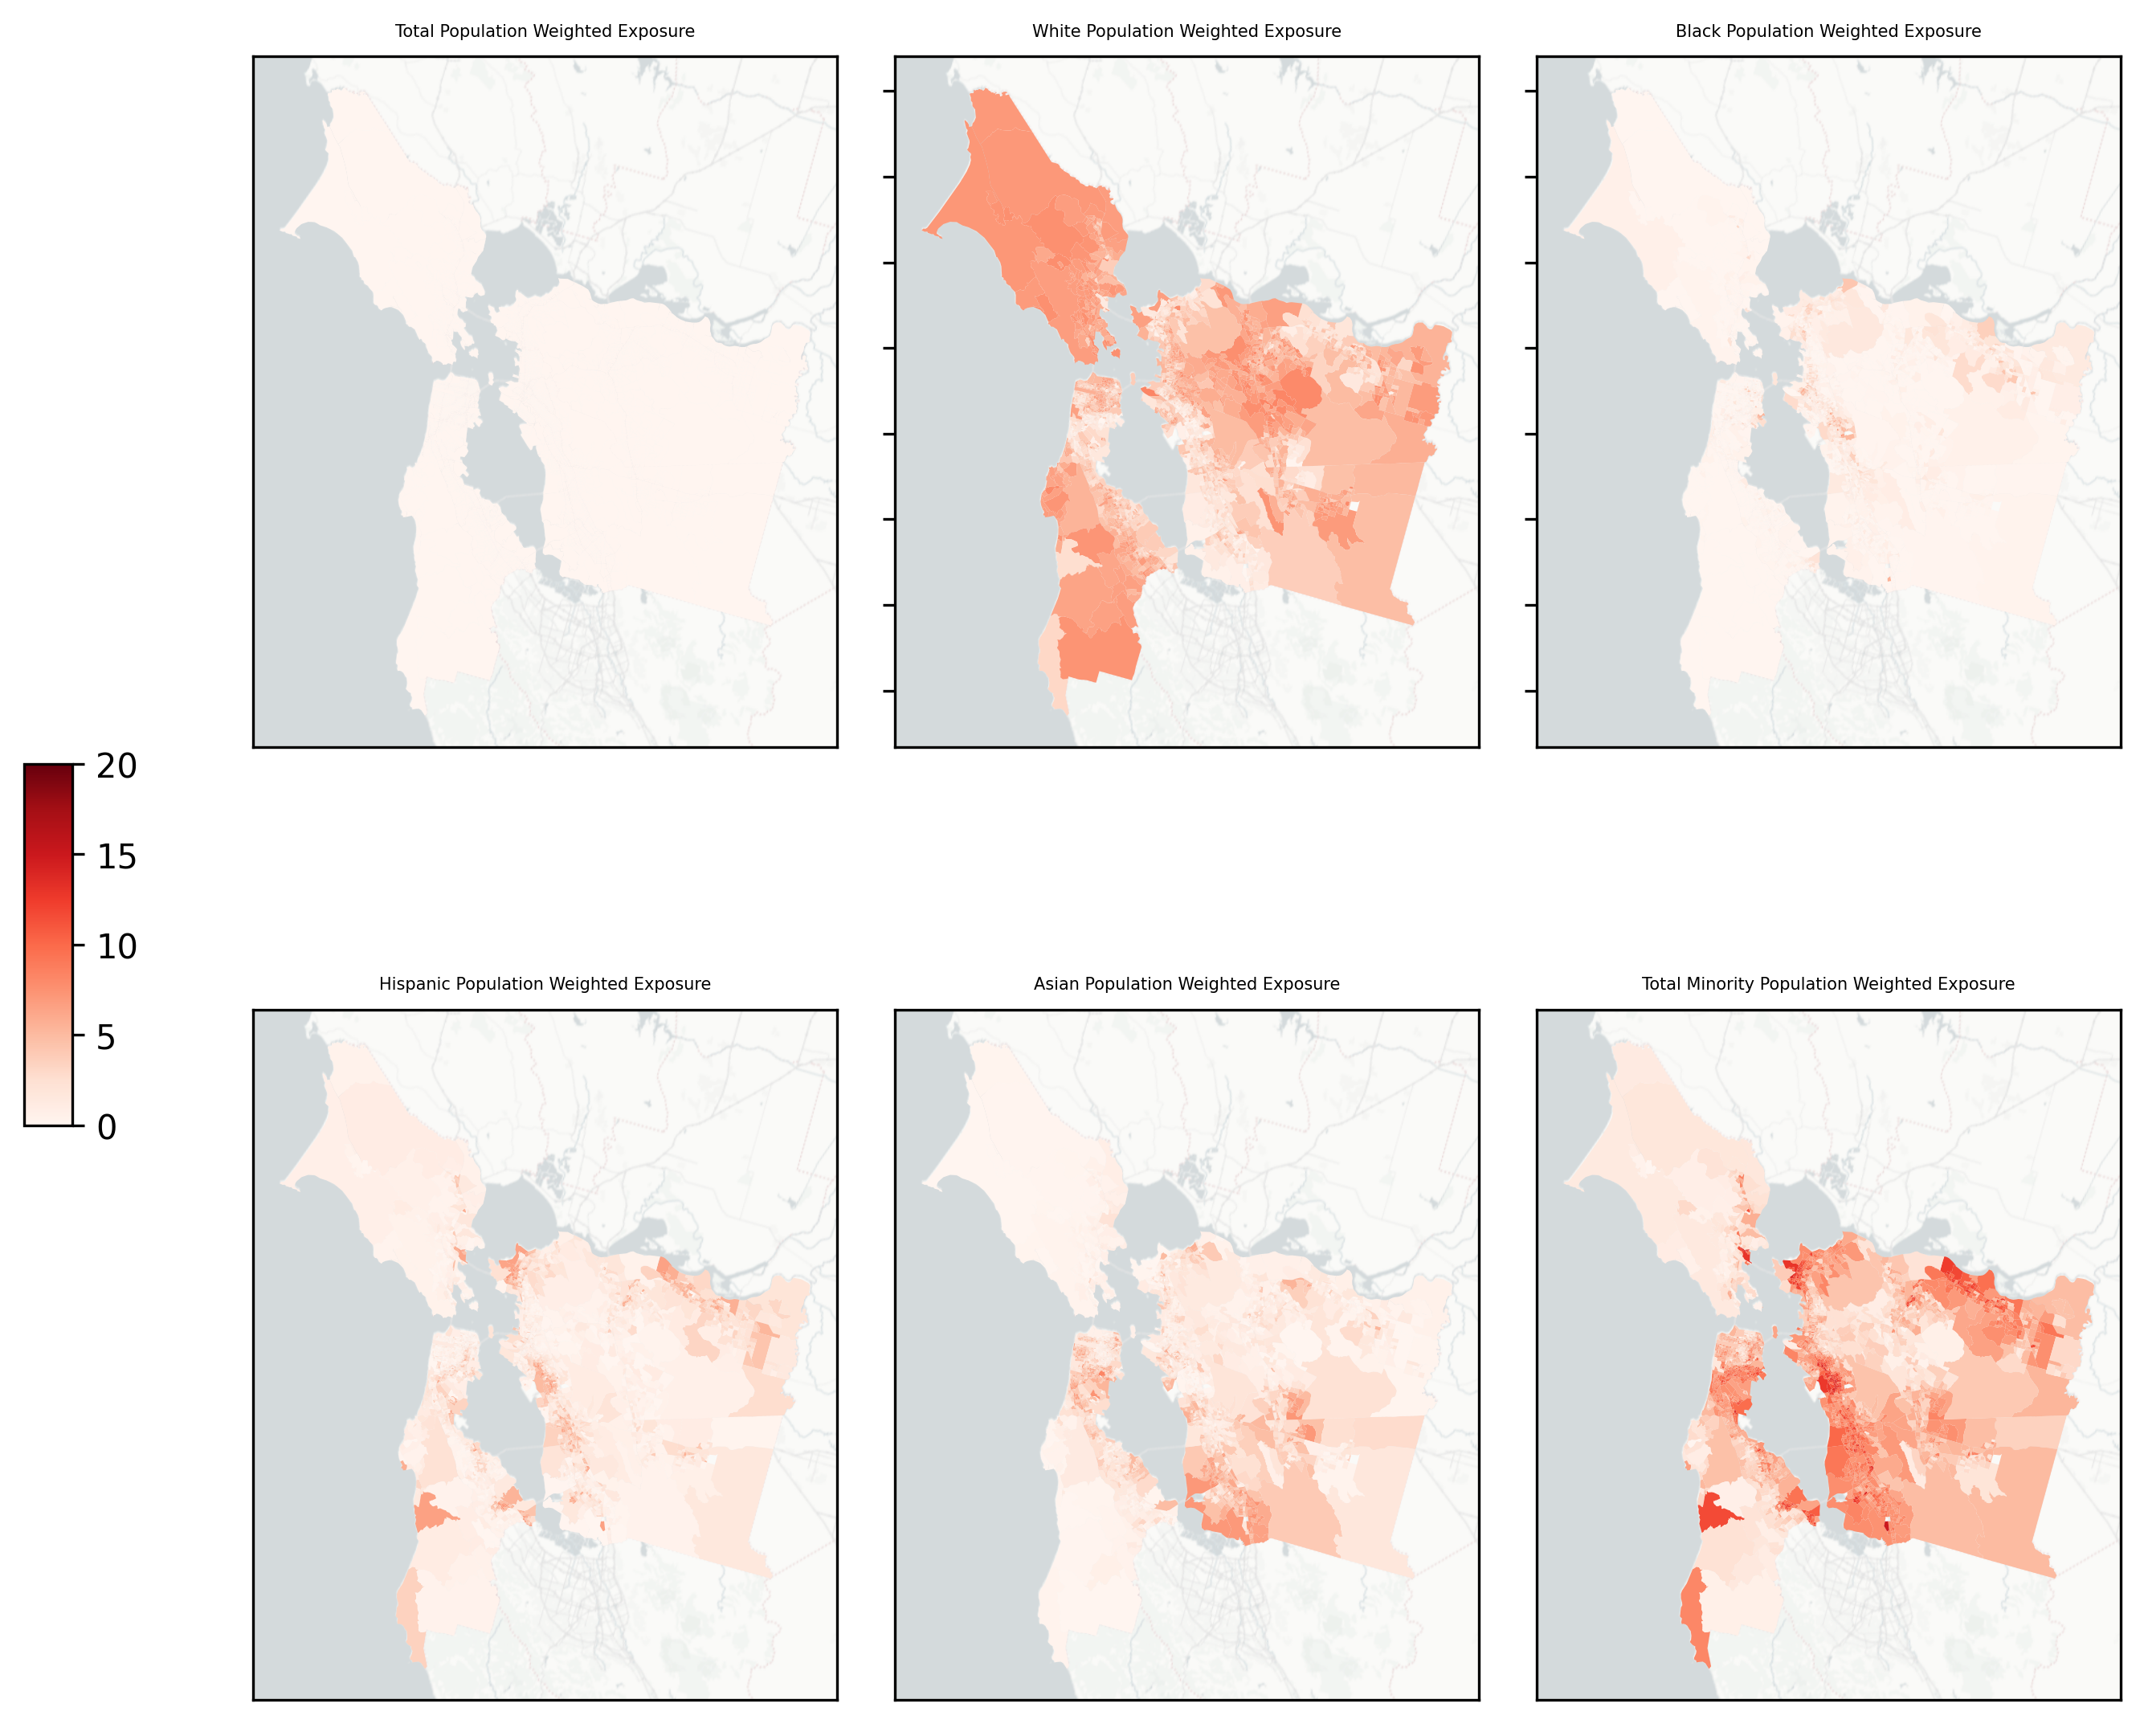

In [47]:
# Population Weighted Exposure

fig, ((ax1, ax2, ax3), (ax4, ax5,ax6))  = plt.subplots(2,3, sharey='row', figsize=(10,10), dpi=300)

plt.yticks([])

plt.subplots_adjust(wspace=0.1, 
                    hspace=0.1)


# Figure 1- Total
pop_weighted_gdf.plot(column=('Pop Weighted Exposure'),markersize=1, ax=ax1, cmap="Reds", vmin=0, vmax=20)
ax1.set_title("Total Population Weighted Exposure", fontsize=5)
ax1.axes.xaxis.set_visible(False)
ax1.axes.yaxis.set_visible(False)
# Add basemap
contextily.add_basemap(ax=ax1, crs=san_fran_cbg.crs,  source=contextily.providers.CartoDB.PositronNoLabels)


# Figure 2- White
pop_weighted_gdf.plot(column=('White Pop Weighted Exposure'),markersize=1, ax=ax2, cmap="Reds",  vmin=0, vmax=20)
ax2.set_title("White Population Weighted Exposure", fontsize=5)
ax2.axes.xaxis.set_visible(False)
# Add basemap
contextily.add_basemap(ax=ax2, crs=san_fran_cbg.crs,  source=contextily.providers.CartoDB.PositronNoLabels)


# Figure 3- Black
pop_weighted_gdf.plot(column=('Black Pop Weighted Exposure'),markersize=1, ax=ax3, cmap="Reds", vmin=0, vmax=20)
ax3.set_title("Black Population Weighted Exposure", fontsize=5)
ax3.axes.xaxis.set_visible(False)
# Add basemap
contextily.add_basemap(ax=ax3, crs=san_fran_cbg.crs,  source=contextily.providers.CartoDB.PositronNoLabels)

# Figure 4- Hispanic
pop_weighted_gdf.plot(column=('Hispanic Pop Weighted Exposure'),markersize=1, ax=ax4, cmap="Reds", vmin=0, vmax=20)
ax4.set_title("Hispanic Population Weighted Exposure", fontsize=5)
# Add basemap
contextily.add_basemap(ax=ax4, crs=san_fran_cbg.crs,  source=contextily.providers.CartoDB.PositronNoLabels)
ax4.axes.xaxis.set_visible(False)

# Figure 5- Asian
pop_weighted_gdf.plot(column=('Asian Pop Weighted Exposure'),markersize=1, ax=ax5, cmap="Reds", vmin=0, vmax=20)
ax5.set_title("Asian Population Weighted Exposure", fontsize=5)
# Add basemap
contextily.add_basemap(ax=ax5, crs=san_fran_cbg.crs,  source=contextily.providers.CartoDB.PositronNoLabels)
ax5.axes.xaxis.set_visible(False)

# Figure 6- All Minorities
pop_weighted_gdf.plot(column=('Minority Pop Weighted Exposure'),markersize=1, ax=ax6, cmap="Reds", vmin=0, vmax=20)
ax6.set_title("Total Minority Population Weighted Exposure", fontsize=5)
# Add basemap
contextily.add_basemap(ax=ax6, crs=san_fran_cbg.crs,  source=contextily.providers.CartoDB.PositronNoLabels)
ax6.axes.xaxis.set_visible(False)

sm = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=20))
sm.set_array([])
cb_ax = fig.add_axes([0.03, 0.40, 0.02, 0.15])
cb= plt.colorbar(sm, cax=cb_ax)



# Quantile Calculations

In [ ]:
pop_weighted.quantile(.8, axis = 0)

In [ ]:
pop_weighted.quantile(.9, axis = 0)

In [ ]:
pop_weighted.quantile(.95, axis = 0)

## Total

In [48]:
# 80-90
selected_pop_weighted_gdf=pop_weighted_gdf.loc[pop_weighted_gdf["Pop Weighted Exposure"] >=  0.003480]
selected_pop_weighted_gdf=selected_pop_weighted_gdf.loc[selected_pop_weighted_gdf["Pop Weighted Exposure"]<= 0.004207710]

In [49]:
#90-95
selected_pop_weighted_90_gdf=pop_weighted_gdf.loc[pop_weighted_gdf["Pop Weighted Exposure"] >= 0.004207710]
selected_pop_weighted_90_95_gdf=selected_pop_weighted_90_gdf.loc[selected_pop_weighted_90_gdf["Pop Weighted Exposure"] <= 0.004829459]

In [50]:
#95-100
selected_pop_weighted_95_100_gdf=selected_pop_weighted_90_gdf.loc[selected_pop_weighted_90_gdf["Pop Weighted Exposure"] >= 0.004829459]

In [52]:
roads = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Data/Roads/tl_2021_06_prisecroads.shp')
roads_proj = roads.to_crs('ESRI:102003')

region_roads_proj = gpd.clip(roads_proj, region_proj)

In [53]:
us_rails = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Data/Rail/tl_2021_us_rails.shp')
us_rails_proj = us_rails.to_crs('ESRI:102003')
region_rails_proj = gpd.clip(us_rails_proj,region_proj)

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


Text(0.5, 1.0, 'Resident Population Quantiles')

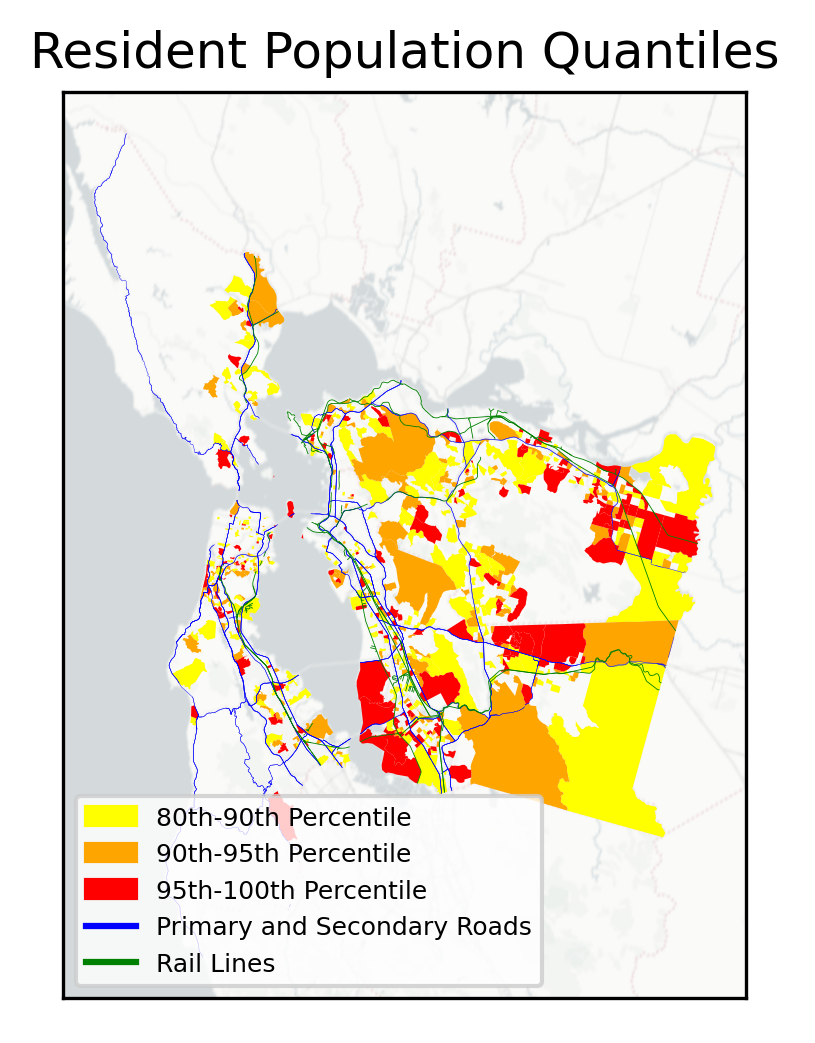

In [55]:
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

fig, ax = plt.subplots(1, 1, dpi=300)

selected_pop_weighted_gdf.plot(ax=ax,column=('Pop Weighted Exposure'), color="yellow")
selected_pop_weighted_90_95_gdf.plot(ax=ax,column=('Pop Weighted Exposure'), color="orange")
selected_pop_weighted_95_100_gdf.plot(ax=ax,column=('Pop Weighted Exposure'), color="red")
region_roads_proj.plot(ax=ax, linewidth=0.1, markersize=0, color="blue")
region_rails_proj.plot(ax=ax, linewidth=0.2, markersize=0, color="green")


contextily.add_basemap(ax=ax,crs=san_fran_cbg.crs,  source=contextily.providers.CartoDB.PositronNoLabels)

yellow_patch = mpatches.Patch(color='yellow', label='80th-90th Percentile')
orange_patch = mpatches.Patch(color='orange', label='90th-95th Percentile')
red_patch = mpatches.Patch(color='red', label='95th-100th Percentile')
line = Line2D([0], [0], label='Primary and Secondary Roads', color='blue')
line2 = Line2D([0], [0], label='Rail Lines', color='green')
ax.legend(handles=[yellow_patch, orange_patch, red_patch,line, line2], loc='lower left',
          prop={'size': 6})



#region_roads_proj = gpd.clip(roads_proj, region_proj)

#ax = region_proj.plot(edgecolor='k', facecolor='none')


plt.yticks([])
plt.xticks([])
plt.title("Resident Population Quantiles")

## Minority

In [ ]:
# 80-90
selected_pop_weighted_gdf=pop_weighted_gdf.loc[pop_weighted_gdf["Minority Pop Weighted Exposure"] >= 8.401342]
selected_pop_weighted_gdf=selected_pop_weighted_gdf.loc[selected_pop_weighted_gdf["Minority Pop Weighted Exposure"]<= 9.816040]

In [ ]:
#90-95
selected_pop_weighted_90_gdf=pop_weighted_gdf.loc[pop_weighted_gdf["Minority Pop Weighted Exposure"] >= 9.816040]
selected_pop_weighted_90_95_gdf=selected_pop_weighted_90_gdf.loc[selected_pop_weighted_90_gdf["Minority Pop Weighted Exposure"] <= 11.27053]

In [ ]:
#95-100
selected_pop_weighted_95_100_gdf=selected_pop_weighted_90_gdf.loc[selected_pop_weighted_90_gdf["Minority Pop Weighted Exposure"] >= 11.27053]

In [ ]:
roads = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Data/Roads/tl_2021_06_prisecroads.shp')
roads_proj = roads.to_crs('ESRI:102003')

region_roads_proj = gpd.clip(roads_proj, region_proj)

In [ ]:
us_rails = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Data/Rail/tl_2021_us_rails.shp')
us_rails_proj = us_rails.to_crs('ESRI:102003')
region_rails_proj = gpd.clip(us_rails_proj,region_proj)
#region_rails_proj.to_file('/content/drive/MyDrive/Colab Notebooks/Data/Rail/SF_tl_2021_us_rails.geojson', driver='GeoJSON')

#region_rails_proj = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Data/Rail/SF_tl_2021_us_rails.geojson')

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


Text(0.5, 1.0, 'Minority Population Quantiles')

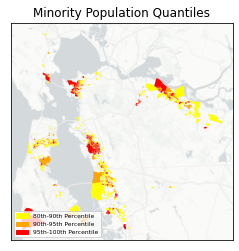

In [ ]:
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

fig, ax = plt.subplots(1, 1)

selected_pop_weighted_gdf.plot(ax=ax,column=('Minority Pop Weighted Exposure'), color="yellow")
selected_pop_weighted_90_95_gdf.plot(ax=ax,column=('Minority Pop Weighted Exposure'), color="orange")
selected_pop_weighted_95_100_gdf.plot(ax=ax,column=('Minority Pop Weighted Exposure'), color="red")


contextily.add_basemap(ax=ax,crs=san_fran_cbg.crs,  source=contextily.providers.CartoDB.PositronNoLabels)

yellow_patch = mpatches.Patch(color='yellow', label='80th-90th Percentile')
orange_patch = mpatches.Patch(color='orange', label='90th-95th Percentile')
red_patch = mpatches.Patch(color='red', label='95th-100th Percentile')
ax.legend(handles=[yellow_patch, orange_patch, red_patch], loc='lower left',
          prop={'size': 6})

plt.yticks([])
plt.xticks([])
plt.title("Minority Population Quantiles")

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


Text(0.5, 1.0, 'Minority Population Quantiles with Roads and Rail')

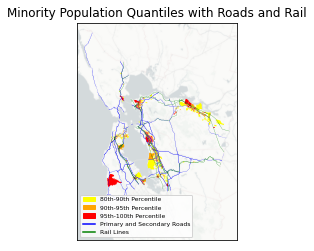

In [ ]:
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

fig, ax = plt.subplots(1, 1)

selected_pop_weighted_gdf.plot(ax=ax,column=('Minority Pop Weighted Exposure'), color="yellow")
selected_pop_weighted_90_95_gdf.plot(ax=ax,column=('Minority Pop Weighted Exposure'), color="orange")
selected_pop_weighted_95_100_gdf.plot(ax=ax,column=('Minority Pop Weighted Exposure'), color="red")
region_roads_proj.plot(ax=ax, linewidth=0.1, markersize=0, color="blue")
region_rails_proj.plot(ax=ax, linewidth=0.2, markersize=0, color="green")

contextily.add_basemap(ax=ax,crs=san_fran_cbg.crs,  source=contextily.providers.CartoDB.PositronNoLabels)

yellow_patch = mpatches.Patch(color='yellow', label='80th-90th Percentile')
orange_patch = mpatches.Patch(color='orange', label='90th-95th Percentile')
red_patch = mpatches.Patch(color='red', label='95th-100th Percentile')
line = Line2D([0], [0], label='Primary and Secondary Roads', color='blue')
line2 = Line2D([0], [0], label='Rail Lines', color='green')
ax.legend(handles=[yellow_patch, orange_patch, red_patch,line, line2], loc='lower left',
          prop={'size': 6})

plt.yticks([])
plt.xticks([])
plt.title("Minority Population Quantiles with Roads and Rail")


/usr/local/lib/python3.7/dist-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 26 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


KeyboardInterrupt: ignored

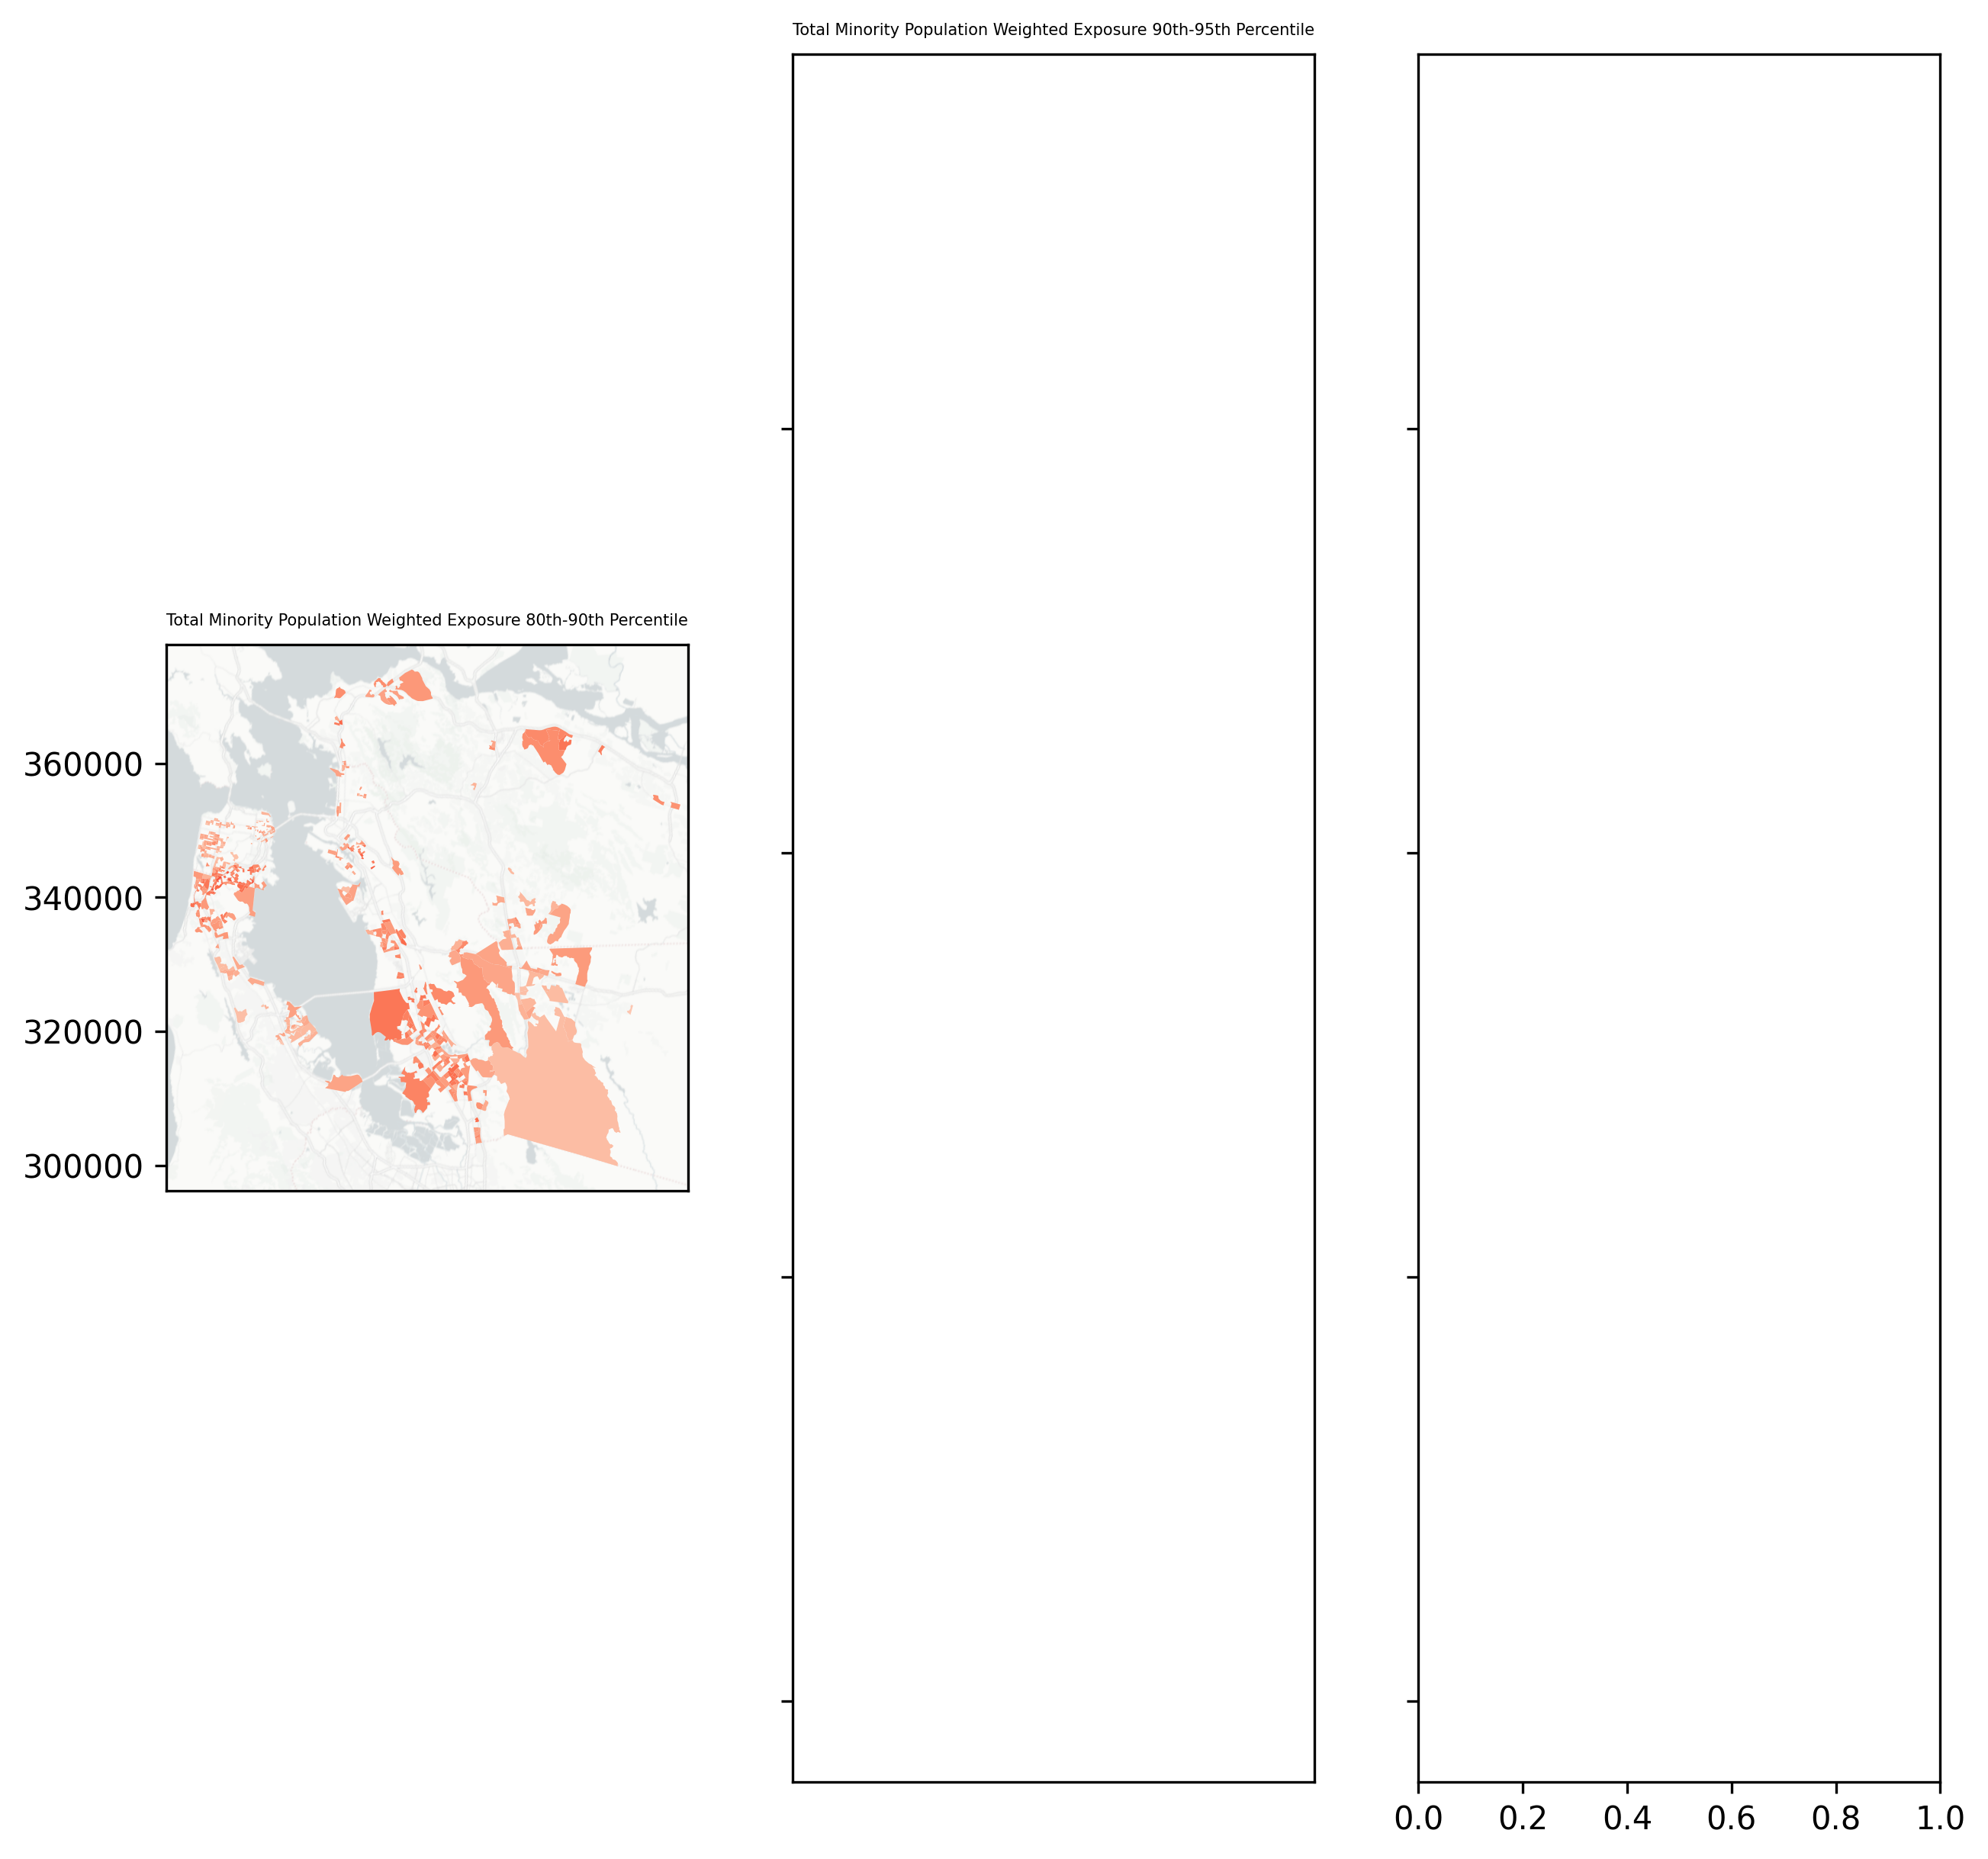

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey='row', figsize=(10,10), dpi=300)

# Figure 1- All Minorities 80-90
selected_pop_weighted_gdf.plot(column=('Minority Pop Weighted Exposure'),markersize=1, ax=ax1,cmap="Reds", vmin=0, vmax=20)
ax1.set_title("Total Minority Population Weighted Exposure 80th-90th Percentile",
              fontsize=5)
ax1.axes.xaxis.set_visible(False)

# Add basemap
contextily.add_basemap(ax=ax1, crs=san_fran_cbg.crs,  source=contextily.providers.CartoDB.PositronNoLabels)

# Figure 2- All Minorities 90-95
selected_pop_weighted_90_95_gdf.plot(column=('Minority Pop Weighted Exposure'),markersize=1, 
                                     ax=ax2,cmap="Reds", vmin=0, vmax=20)
ax2.set_title("Total Minority Population Weighted Exposure 90th-95th Percentile",
              fontsize=5)
ax2.axes.xaxis.set_visible(False)

# Add basemap
contextily.add_basemap(ax=ax2, crs=san_fran_cbg.crs,  source=contextily.providers.CartoDB.PositronNoLabels)

# Figure 3- All Minorities 95-100
selected_pop_weighted_95_100_gdf.plot(column=('Minority Pop Weighted Exposure'),markersize=1, 
                                     ax=ax3,cmap="Reds", vmin=0, vmax=20)
ax3.set_title("Total Minority Population Weighted Exposure 95th-100th Percentile",
              fontsize=5)
ax3.axes.xaxis.set_visible(False)

# Add basemap
contextily.add_basemap(ax=ax3, crs=san_fran_cbg.crs,  source=contextily.providers.CartoDB.PositronNoLabels)

plt.yticks([])



#cb_ax = fig.add_axes([0.03, 0.40, 0.02, 0.15])
#cbar=fig.colorbar(sm, cax=cb_ax)
#cbar.ax.tick_params(labelsize=10) 

## White

In [ ]:
# 80-90
selected_pop_weighted_gdf=pop_weighted_gdf.loc[pop_weighted_gdf["White Pop Weighted Exposure"] >= 5.934890]
selected_pop_weighted_gdf=selected_pop_weighted_gdf.loc[selected_pop_weighted_gdf["White Pop Weighted Exposure"]<= 6.692970]

In [ ]:
#90-95
selected_pop_weighted_90_gdf=pop_weighted_gdf.loc[pop_weighted_gdf["White Pop Weighted Exposure"] >= 6.692970]
selected_pop_weighted_90_95_gdf=selected_pop_weighted_90_gdf.loc[selected_pop_weighted_90_gdf["White Pop Weighted Exposure"] <= 7.143934]

In [ ]:
#95-100
selected_pop_weighted_95_100_gdf=selected_pop_weighted_90_gdf.loc[selected_pop_weighted_90_gdf["White Pop Weighted Exposure"] >= 7.143934]

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


Text(0.5, 1.0, 'White Population Quantiles')

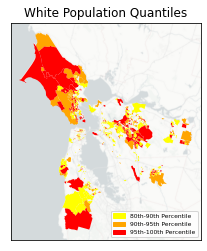

In [ ]:
fig, ax = plt.subplots(1, 1)

selected_pop_weighted_gdf.plot(ax=ax,column=('White Pop Weighted Exposure'), color="yellow")
selected_pop_weighted_90_95_gdf.plot(ax=ax,column=('White Pop Weighted Exposure'), color="orange")
selected_pop_weighted_95_100_gdf.plot(ax=ax,column=('White Pop Weighted Exposure'), color="red")

contextily.add_basemap(ax=ax,crs=san_fran_cbg.crs,  source=contextily.providers.CartoDB.PositronNoLabels)

yellow_patch = mpatches.Patch(color='yellow', label='80th-90th Percentile')
orange_patch = mpatches.Patch(color='orange', label='90th-95th Percentile')
red_patch = mpatches.Patch(color='red', label='95th-100th Percentile')
ax.legend(handles=[yellow_patch, orange_patch, red_patch ], loc='lower right',
          prop={'size': 6})

plt.yticks([])
plt.xticks([])
plt.title("White Population Quantiles")


## Black

In [ ]:
# 80-90
selected_pop_weighted_gdf=pop_weighted_gdf.loc[pop_weighted_gdf["Black Pop Weighted Exposure"] >= 1.010371]
selected_pop_weighted_gdf=selected_pop_weighted_gdf.loc[selected_pop_weighted_gdf["Black Pop Weighted Exposure"]<= 1.797759]

In [ ]:
#90-95
selected_pop_weighted_90_gdf=pop_weighted_gdf.loc[pop_weighted_gdf["Black Pop Weighted Exposure"] >= 1.797759]
selected_pop_weighted_90_95_gdf=selected_pop_weighted_90_gdf.loc[selected_pop_weighted_90_gdf["Black Pop Weighted Exposure"] <= 2.608357]

In [ ]:
#95-100
selected_pop_weighted_95_100_gdf=selected_pop_weighted_90_gdf.loc[selected_pop_weighted_90_gdf["Black Pop Weighted Exposure"] >= 2.608357]

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


Text(0.5, 1.0, 'Black Population Quantiles')

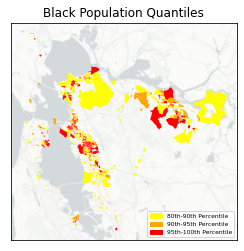

In [ ]:
fig, ax = plt.subplots(1, 1)

selected_pop_weighted_gdf.plot(ax=ax,column=('Black Pop Weighted Exposure'), color="yellow")
selected_pop_weighted_90_95_gdf.plot(ax=ax,column=('Black Pop Weighted Exposure'), color="orange")
selected_pop_weighted_95_100_gdf.plot(ax=ax,column=('Black Pop Weighted Exposure'), color="red")

contextily.add_basemap(ax=ax,crs=san_fran_cbg.crs,  source=contextily.providers.CartoDB.PositronNoLabels)

yellow_patch = mpatches.Patch(color='yellow', label='80th-90th Percentile')
orange_patch = mpatches.Patch(color='orange', label='90th-95th Percentile')
red_patch = mpatches.Patch(color='red', label='95th-100th Percentile')
ax.legend(handles=[yellow_patch, orange_patch, red_patch ], loc='lower right',
          prop={'size': 6})

plt.yticks([])
plt.xticks([])
plt.title("Black Population Quantiles")


## Hispanic

In [ ]:
# 80-90
selected_pop_weighted_gdf=pop_weighted_gdf.loc[pop_weighted_gdf["Hispanic Pop Weighted Exposure"] >= 2.769852]
selected_pop_weighted_gdf=selected_pop_weighted_gdf.loc[selected_pop_weighted_gdf["Hispanic Pop Weighted Exposure"]<= 4.105971]

In [ ]:
#90-95
selected_pop_weighted_90_gdf=pop_weighted_gdf.loc[pop_weighted_gdf["Hispanic Pop Weighted Exposure"] >= 4.105971]
selected_pop_weighted_90_95_gdf=selected_pop_weighted_90_gdf.loc[selected_pop_weighted_90_gdf["Hispanic Pop Weighted Exposure"] <= 5.299845]

In [ ]:
#95-100
selected_pop_weighted_95_100_gdf=selected_pop_weighted_90_gdf.loc[selected_pop_weighted_90_gdf["Hispanic Pop Weighted Exposure"] >= 5.299845]

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


Text(0.5, 1.0, 'Hispanic Population Quantiles')

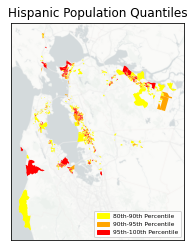

In [ ]:
fig, ax = plt.subplots(1, 1)

selected_pop_weighted_gdf.plot(ax=ax,column=('Hispanic Pop Weighted Exposure'), color="yellow")
selected_pop_weighted_90_95_gdf.plot(ax=ax,column=('Hispanic Pop Weighted Exposure'), color="orange")
selected_pop_weighted_95_100_gdf.plot(ax=ax,column=('Hispanic Pop Weighted Exposure'), color="red")

contextily.add_basemap(ax=ax,crs=san_fran_cbg.crs,  source=contextily.providers.CartoDB.PositronNoLabels)

yellow_patch = mpatches.Patch(color='yellow', label='80th-90th Percentile')
orange_patch = mpatches.Patch(color='orange', label='90th-95th Percentile')
red_patch = mpatches.Patch(color='red', label='95th-100th Percentile')
ax.legend(handles=[yellow_patch, orange_patch, red_patch ], loc='lower right',
          prop={'size': 6})

plt.yticks([])
plt.xticks([])
plt.title("Hispanic Population Quantiles")


## Asian

In [ ]:
# 80-90
selected_pop_weighted_gdf=pop_weighted_gdf.loc[pop_weighted_gdf["Asian Pop Weighted Exposure"] >= 3.596519]
selected_pop_weighted_gdf=selected_pop_weighted_gdf.loc[selected_pop_weighted_gdf["Asian Pop Weighted Exposure"]<= 4.749713]

In [ ]:
#90-95
selected_pop_weighted_90_gdf=pop_weighted_gdf.loc[pop_weighted_gdf["Asian Pop Weighted Exposure"] >= 4.749713]
selected_pop_weighted_90_95_gdf=selected_pop_weighted_90_gdf.loc[selected_pop_weighted_90_gdf["Asian Pop Weighted Exposure"] <=  5.699000]

In [ ]:
#95-100
selected_pop_weighted_95_100_gdf=selected_pop_weighted_90_gdf.loc[selected_pop_weighted_90_gdf["Asian Pop Weighted Exposure"] >=  5.699000]

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


Text(0.5, 1.0, 'Asian Population Quantiles')

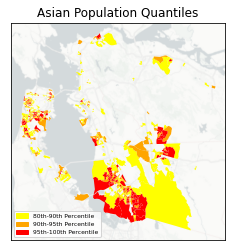

In [ ]:
fig, ax = plt.subplots(1, 1)

selected_pop_weighted_gdf.plot(ax=ax,column=('Asian Pop Weighted Exposure'), color="yellow")
selected_pop_weighted_90_95_gdf.plot(ax=ax,column=('Asian Pop Weighted Exposure'), color="orange")
selected_pop_weighted_95_100_gdf.plot(ax=ax,column=('Asian Pop Weighted Exposure'), color="red")

contextily.add_basemap(ax=ax,crs=san_fran_cbg.crs,  source=contextily.providers.CartoDB.PositronNoLabels)

yellow_patch = mpatches.Patch(color='yellow', label='80th-90th Percentile')
orange_patch = mpatches.Patch(color='orange', label='90th-95th Percentile')
red_patch = mpatches.Patch(color='red', label='95th-100th Percentile')
ax.legend(handles=[yellow_patch, orange_patch, red_patch ], loc='lower left',
          prop={'size': 6})

plt.yticks([])
plt.xticks([])
plt.title("Asian Population Quantiles")



# 3 Plots to Compare

NameError: ignored

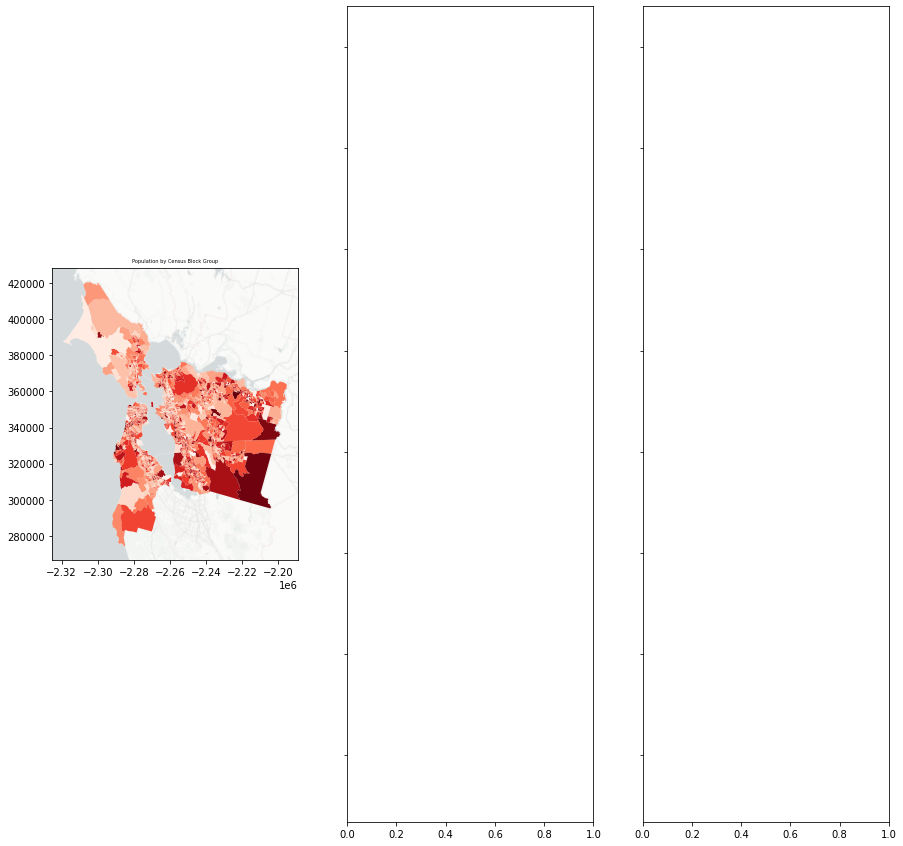

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

#Plot our results
fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, sharey='row', figsize=(15, 15))

# First Plot- Population
pop_weighted_gdf.plot(column=('AMPWM001'),markersize=1, ax=ax1, cmap="Reds")
ax1.set_title("Population by Census Block Group", fontsize=5)
# Add basemap
contextily.add_basemap(ax=ax1, crs=san_fran_cbg.crs,  source=contextily.providers.CartoDB.PositronNoLabels)
ax.set_axis_off();
#Legend
sm = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=min_population, vmax=max_population))
sm.set_array([])
plt.colorbar(sm, ax=ax1, fraction=0.046, pad=0.04)


# Second Plot- Concentration
pop_weighted_gdf.plot(column=('PM 2.5 Average'),markersize=1, ax=ax2, cmap="Reds")
ax2.set_title("PM 2.5 Concentration by Census Block Group", fontsize=5)
# Add basemap
contextily.add_basemap(ax=ax2, crs=san_fran_cbg.crs,  source=contextily.providers.CartoDB.PositronNoLabels)
ax.set_axis_off();
# Legend
sm = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=min_conc, vmax=max_conc))
sm.set_array([])
plt.colorbar(sm, ax=ax2, fraction=0.046, pad=0.04)

# Third Plot- Population Weighted Exposure
pop_weighted_gdf.plot(column=('Pop Weighted Exposure'),markersize=1, ax=ax3, cmap="Reds")
ax3.set_title("Population Weighted Exposure", fontsize=5)
# Add basemap
contextily.add_basemap(ax=ax3, crs=san_fran_cbg.crs,  source=contextily.providers.CartoDB.PositronNoLabels)
ax.set_axis_off(); # Remove axes
# Legend
sm = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=min_pop, vmax=max_pop))
sm.set_array([])
plt.colorbar(sm, ax=ax3, fraction=0.046, pad=0.04)
